In [1]:
# importo el csv a un df
import pandas as pd

df1 = pd.read_csv("./training set values.csv")

In [2]:
# Aproximación rápida al modelo con Pycaret. Tarda 20s
import pycaret
from pycaret.classification import *
df1.id.value_counts()

id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: count, Length: 59400, dtype: int64

In [3]:
df1.describe() #no muestra todas

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [4]:
# analizamos a variable target
df_target=pd.read_csv('./training set labels.csv', sep=',')
#df_target = setup(data=df_target, target='status_group', session_id=1)

In [5]:
df_all_1 = pd.merge(df1, df_target, on='id', how='inner')

In [18]:
# No se puede hacer con variables categóricas
model_setup = setup(data=df_all_1, target='status_group', session_id=1)


ValueError: Cannot cast object dtype to float64

In [9]:
type(model_setup)

pycaret.classification.oop.ClassificationExperiment

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.1860
nb,Naive Bayes,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0380
ridge,Ridge Classifier,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0400
qda,Quadratic Discriminant Analysis,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0590
lda,Linear Discriminant Analysis,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0550
dummy,Dummy Classifier,0.5431,0.0000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0340
ada,Ada Boost Classifier,0.5429,0.0000,0.5429,0.4810,0.3832,0.0000,0.0025,0.3030
gbc,Gradient Boosting Classifier,0.5424,0.0000,0.5424,0.4630,0.3885,0.0017,0.0081,2.1760
xgboost,Extreme Gradient Boosting,0.5407,0.0000,0.5407,0.4449,0.3909,-0.0002,0.0002,0.3080
lightgbm,Light Gradient Boosting Machine,0.5404,0.0000,0.5404,0.4397,0.3922,-0.0000,-0.0008,0.5110


In [13]:
model_lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5433,0.0000,0.5433,0.2952,0.3825,0.0000,0.0000
1,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
2,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
3,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
4,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
5,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
6,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
7,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
8,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000


In [14]:
print(model_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
tune_model_rf = tune_model(model_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5433,0.0000,0.5433,0.2952,0.3825,0.0000,0.0000
1,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
2,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
3,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
4,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
5,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
6,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
7,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000
8,0.5430,0.0000,0.5430,0.2949,0.3822,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


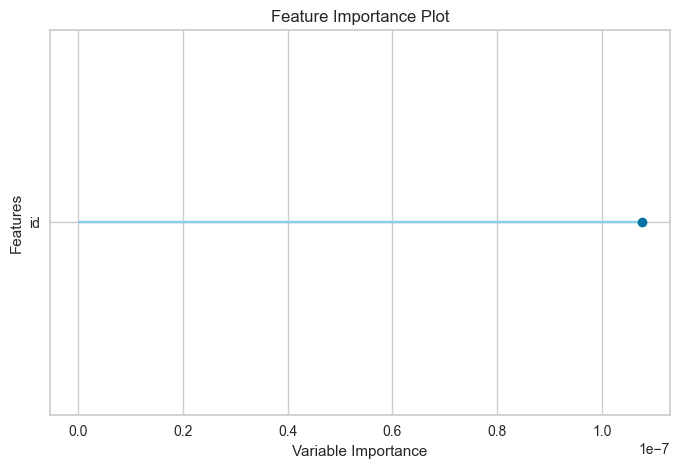

In [17]:
plot_model(tune_model_rf, plot='feature')